In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [10]:
# Load dataset
data = fetch_california_housing(as_frame=True)
df = data.frame
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
X = df[['MedInc']]   # Feature
y = df['MedHouseVal']  # Target


In [12]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [13]:
class LinearRegressionScratch:
    def __init__(self, lr=0.01, epochs=1000):
        self.lr = lr
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        X = np.array(X)
        y = np.array(y)
        n_samples, n_features = X.shape

        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            y_pred = np.dot(X, self.w) + self.b
            dw = (1/n_samples) * np.dot(X.T, (y_pred - y))
            db = (1/n_samples) * np.sum(y_pred - y)

            self.w -= self.lr * dw
            self.b -= self.lr * db

    def predict(self, X):
        X = np.array(X)
        return np.dot(X, self.w) + self.b


In [14]:
model_scratch = LinearRegressionScratch(lr=0.01, epochs=1000)
model_scratch.fit(X_scaled, y)
y_pred_scratch = model_scratch.predict(X_scaled)


In [15]:
model_sklearn = LinearRegression()
model_sklearn.fit(X_scaled, y)
y_pred_sklearn = model_sklearn.predict(X_scaled)


In [16]:
def evaluate(y_true, y_pred):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    return mse, mae, r2

print("Scratch Model:", evaluate(y, y_pred_scratch))
print("Scikit-Learn Model:", evaluate(y, y_pred_sklearn))


Scratch Model: (0.7011311594427899, 0.6262446407726512, 0.4734474849356318)
Scikit-Learn Model: (0.7011311502929526, 0.626259337911434, 0.47344749180719903)


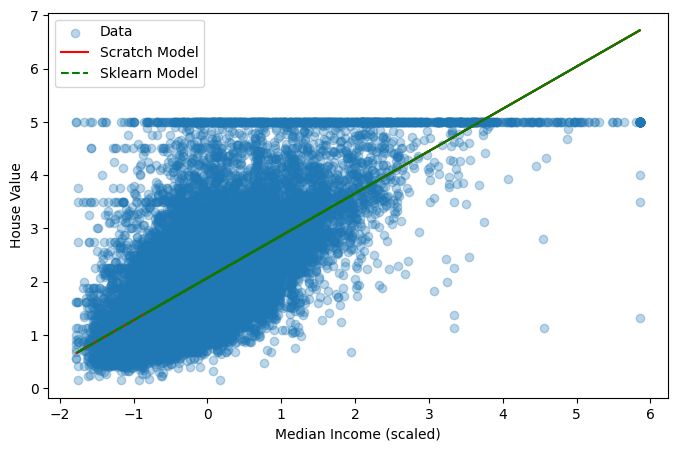

In [17]:
plt.figure(figsize=(8,5))
plt.scatter(X_scaled, y, alpha=0.3, label="Data")
plt.plot(X_scaled, y_pred_scratch, color="red", label="Scratch Model")
plt.plot(X_scaled, y_pred_sklearn, color="green", linestyle="--", label="Sklearn Model")
plt.xlabel("Median Income (scaled)")
plt.ylabel("House Value")
plt.legend()
plt.show()


In [18]:
X_all = df.drop(columns='MedHouseVal')
y_all = df['MedHouseVal']
X_all_scaled = scaler.fit_transform(X_all)

# Scratch model
model_scratch.fit(X_all_scaled, y_all)
y_pred_multi_scratch = model_scratch.predict(X_all_scaled)

# Sklearn model
model_sklearn.fit(X_all_scaled, y_all)
y_pred_multi_sklearn = model_sklearn.predict(X_all_scaled)

print("Scratch Multi:", evaluate(y_all, y_pred_multi_scratch))
print("Sklearn Multi:", evaluate(y_all, y_pred_multi_sklearn))


Scratch Multi: (0.5530449875746686, 0.5460820695747569, 0.5846608366648329)
Sklearn Multi: (0.5243209861846072, 0.5311643817546458, 0.606232685199805)
